# محمد علی قهاری 810100201

In [590]:
from sklearn.model_selection import train_test_split
import csv

In [591]:
file = open("marketing_campaign.csv")
csv_reader = csv.reader(file)
header = next(csv_reader)
rows = []
for row in csv_reader:
    rows.append(row)
file.close()
missed = []
for row in rows:
    missed.append([index for index,s in enumerate(row) if s == ''])
header_miss = []
for i in range(len(header)):
    header_miss.append(sum([row.count(i) for row in missed]))
for i in range(len(header)):
    if(header_miss[i] == 0):
        continue
    print(f"{header[i]} : {header_miss[i]} missed ({round(100 * header_miss[i]/len(rows),2)}%)")

Income : 223 missed (9.96%)
MntCoffee : 205 missed (9.15%)
MntGoldProds : 13 missed (0.58%)
NumWebVisitsMonth : 200 missed (8.93%)


In [592]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

data = pd.read_csv('marketing_campaign.csv')
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2240 non-null   int64  
 1   ID                 2240 non-null   int64  
 2   Year_Birth         2240 non-null   int64  
 3   Education          2240 non-null   object 
 4   Marital_Status     2240 non-null   object 
 5   Income             2017 non-null   float64
 6   Kidhome            2240 non-null   int64  
 7   Teenhome           2240 non-null   int64  
 8   Dt_Customer        2240 non-null   object 
 9   Recency            2240 non-null   int64  
 10  MntCoffee          2035 non-null   float64
 11  MntFruits          2240 non-null   int64  
 12  MntMeatProducts    2240 non-null   int64  
 13  MntFishProducts    2240 non-null   int64  
 14  MntSweetProducts   2240 non-null   int64  
 15  MntGoldProds       2227 non-null   float64
 16  NumWebVisitsMonth  2040 

Unnamed: 0            ID   Year_Birth         Income      Kidhome   
count  2240.000000   2240.000000  2240.000000    2017.000000  2240.000000  \
mean   1119.500000   5592.159821  1968.805804   52297.080317     0.437946   
std     646.776623   3246.662198    11.984069   25543.108215     0.563666   
min       0.000000      0.000000  1893.000000    2447.000000    -5.000000   
25%     559.750000   2828.250000  1959.000000   35340.000000     0.000000   
50%    1119.500000   5458.500000  1970.000000   51369.000000     0.000000   
75%    1679.250000   8427.750000  1977.000000   68316.000000     1.000000   
max    2239.000000  11191.000000  1996.000000  666666.000000     2.000000   

          Teenhome      Recency    MntCoffee    MntFruits  MntMeatProducts   
count  2240.000000  2240.000000  2035.000000  2240.000000      2240.000000  \
mean      0.506250    49.109375   304.239312    26.302232       166.950000   
std       0.544538    28.962453   337.515534    39.773434       225.715373   
min       0.000000     0.000000     0.000000     0.000000         0.000000   
25%       0.000000    24.000000    23.000000     1.000000        16.000000   
50%       0.000000    49.000000   177.000000     8.000000        67.000000   
75%       1.000000    74.000000   505.000000    33.000000       232.000000   
max       2.000000    99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumWebVisitsMonth   
count      2240.000000       2240.000000   2227.000000        2040.000000  \
mean         37.525446         27.062946     43.847777           5.326961   
std          54.628979         41.280498     51.897098           2.439349   
min           0.000000          0.000000      0.000000           0.000000   
25%           3.000000          1.000000      9.000000           3.000000   
50%          12.000000          8.000000     24.000000           6.000000   
75%          50.000000         33.000000     56.000000           7.000000   
max         259.000000        263.000000    362.000000          20.000000   

          Complain  NumPurchases  UsedCampaignOffer  
count  2240.000000   2240.000000        2240.000000  
mean      0.009375     14.862054           0.271875  
std       0.096391      7.677173           0.445025  
min       0.000000      0.000000           0.000000  
25%       0.000000      8.000000           0.000000  
50%       0.000000     15.000000           0.000000  
75%       0.000000     21.000000           1.000000  
max       1.000000     44.000000           1.000000

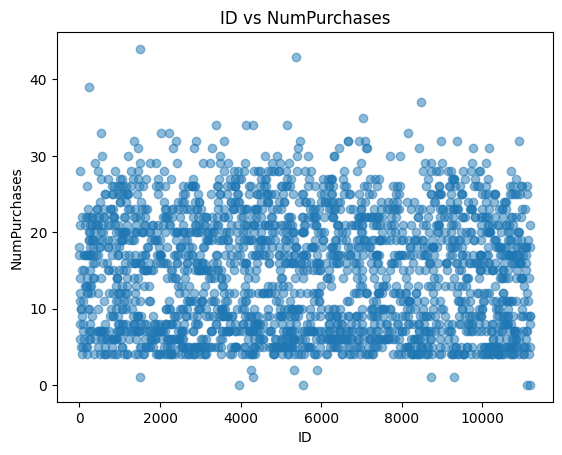

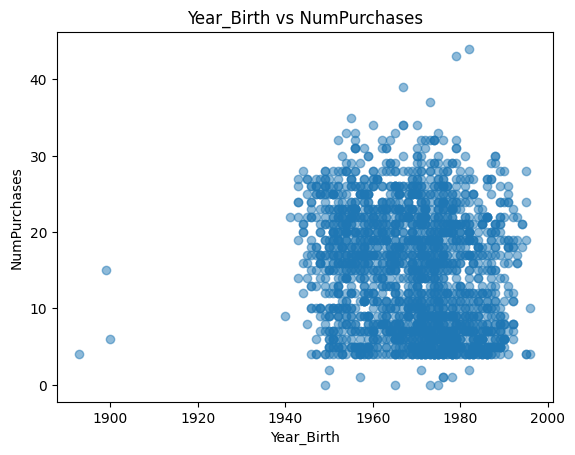

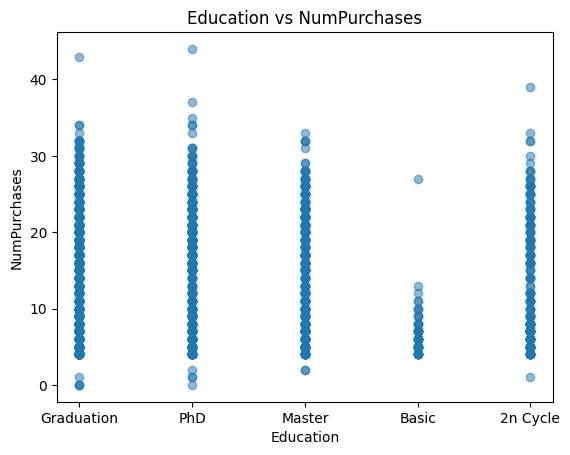

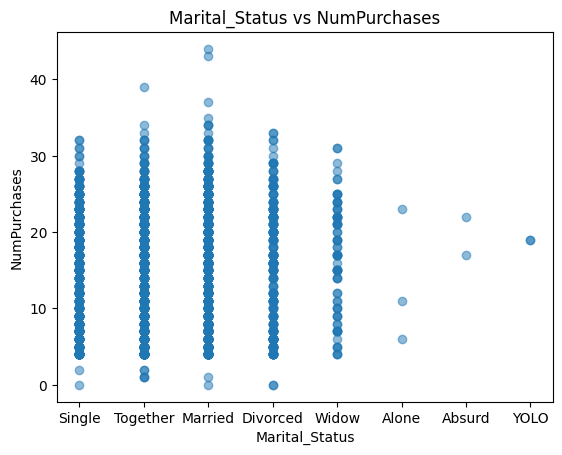

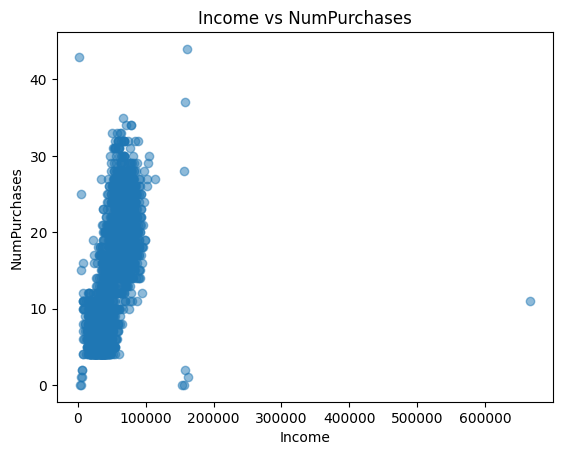

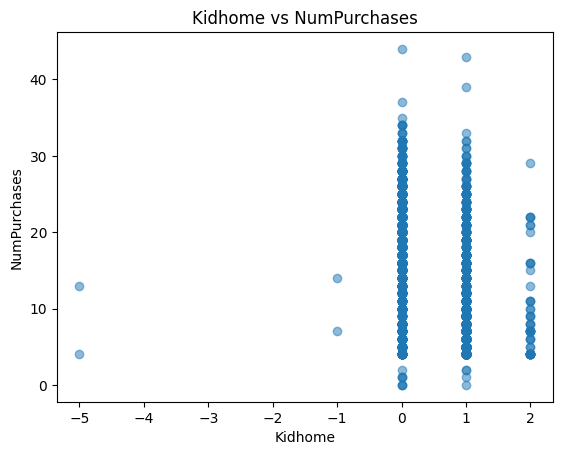

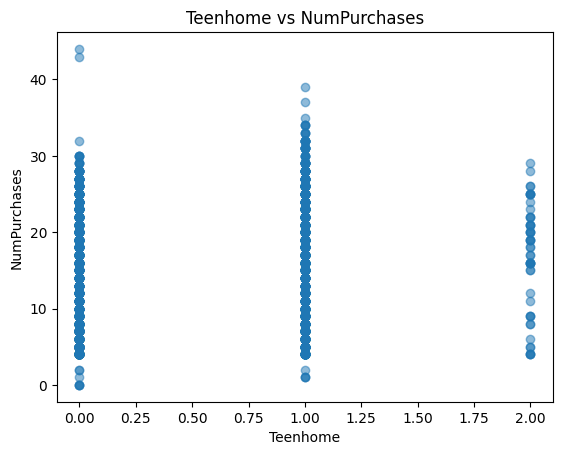

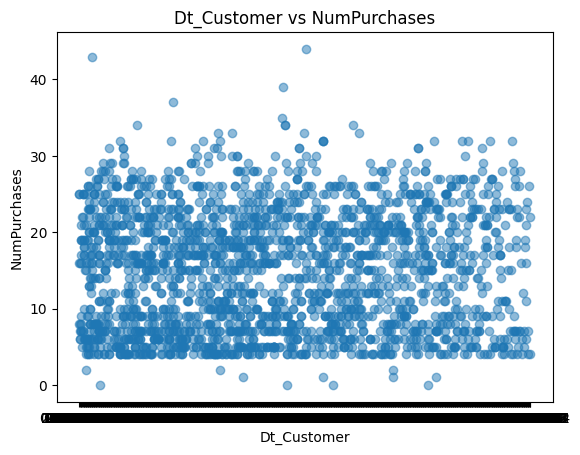

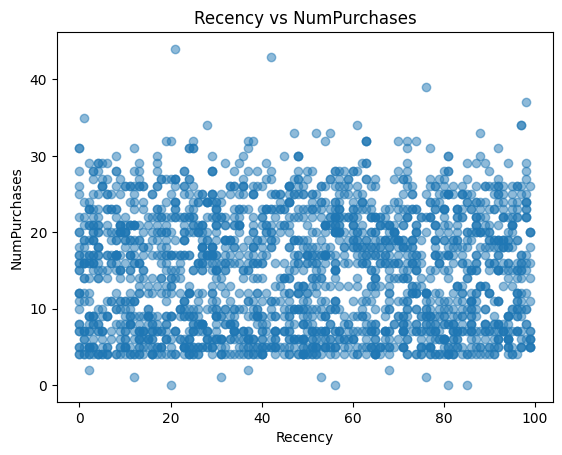

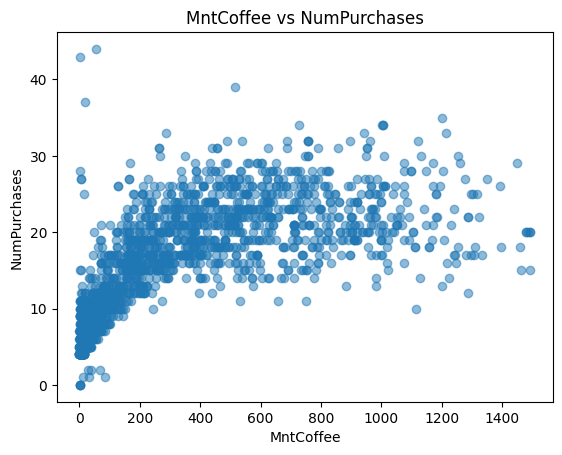

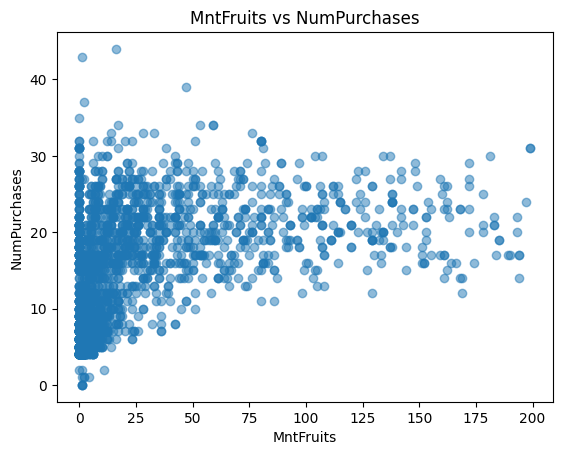

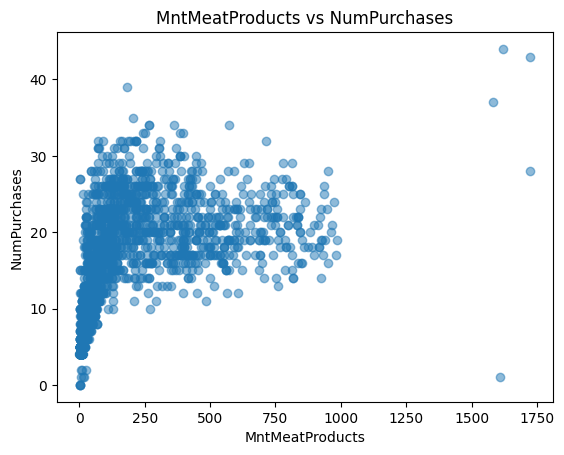

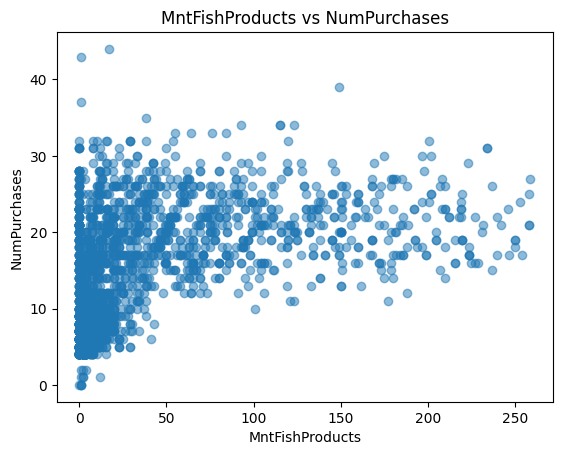

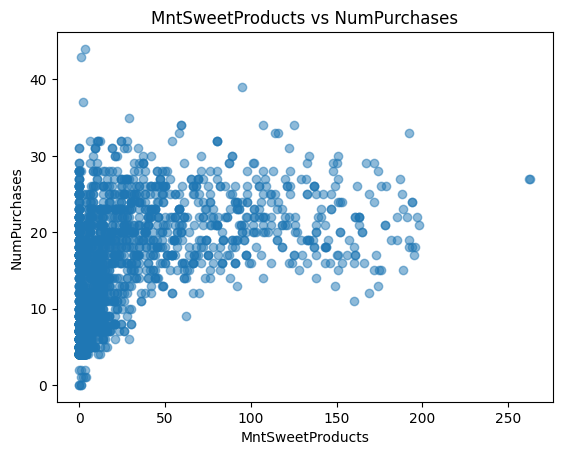

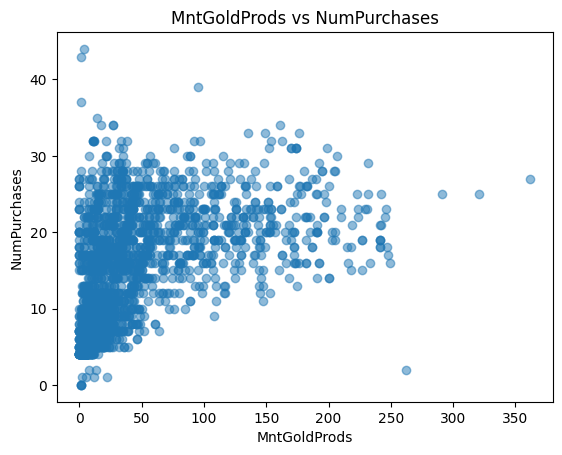

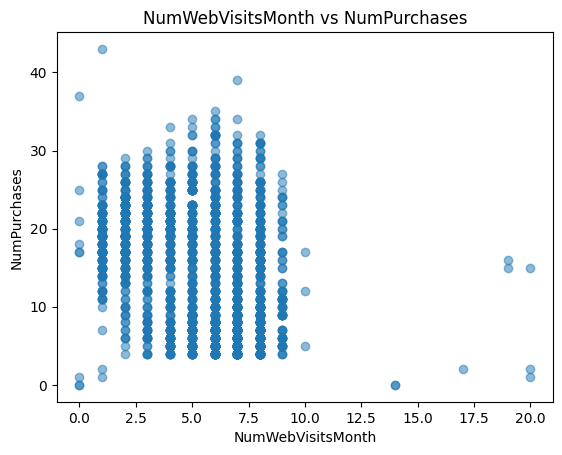

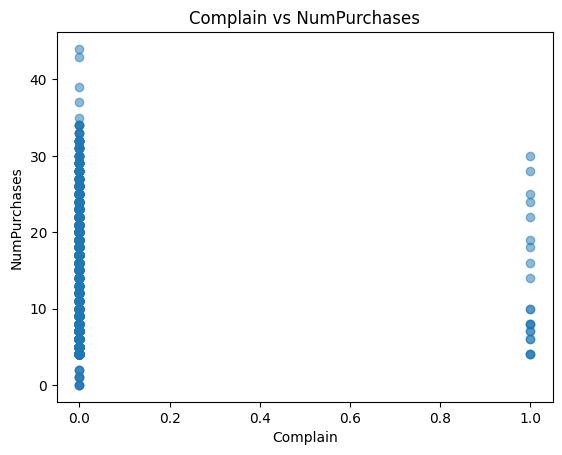

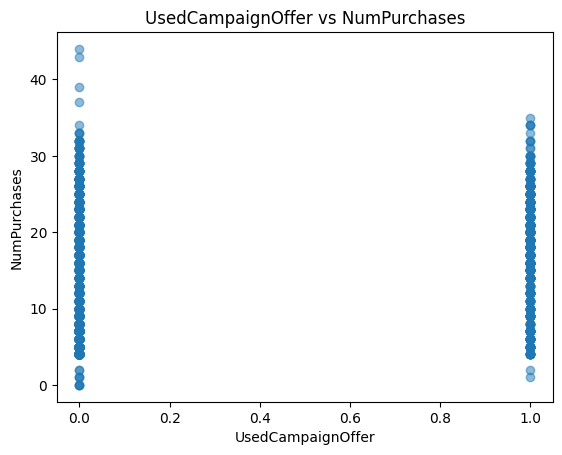

In [593]:
target_column = 'NumPurchases'
feature_columns = [col for col in data.columns if col != target_column]
for feature_column in feature_columns:
    if(feature_column.startswith('Unnamed')):
        continue
    plt.scatter(data[feature_column], data[target_column], alpha=0.5)
    plt.title(f'{feature_column} vs {target_column}')
    plt.xlabel(feature_column)
    plt.ylabel(target_column)
    plt.show()

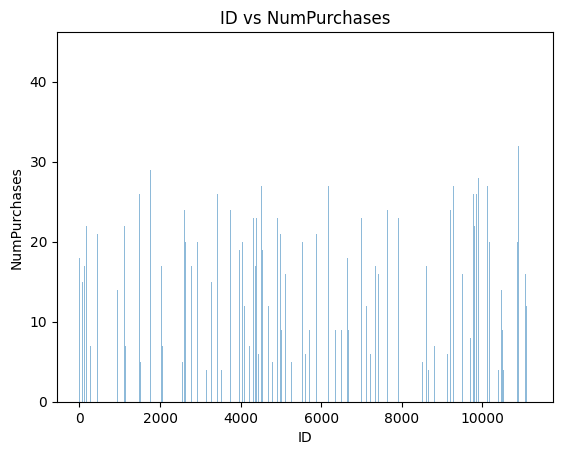

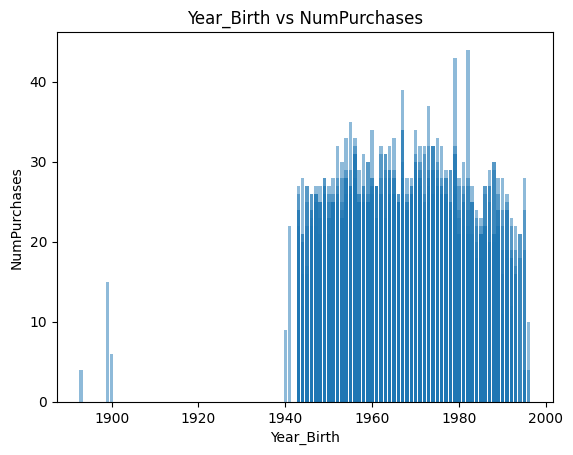

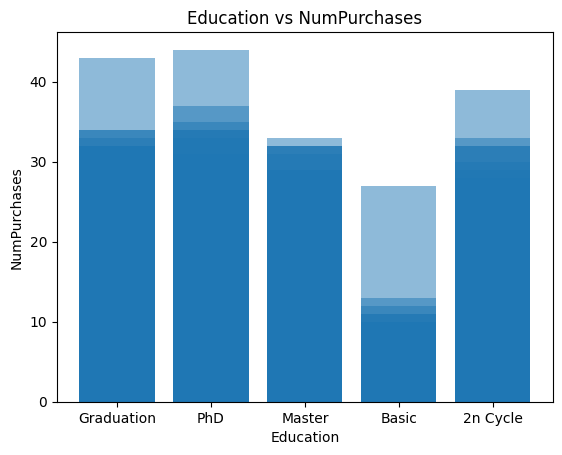

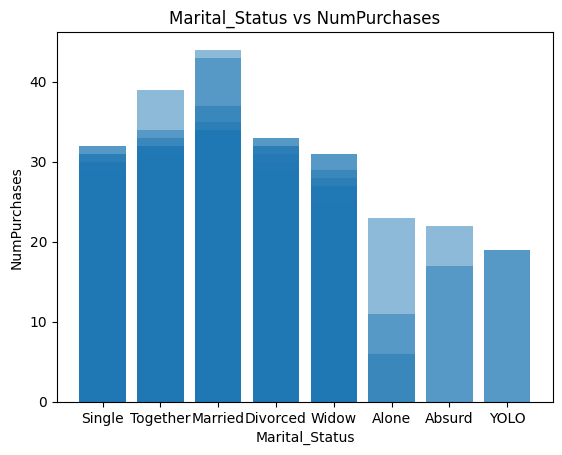

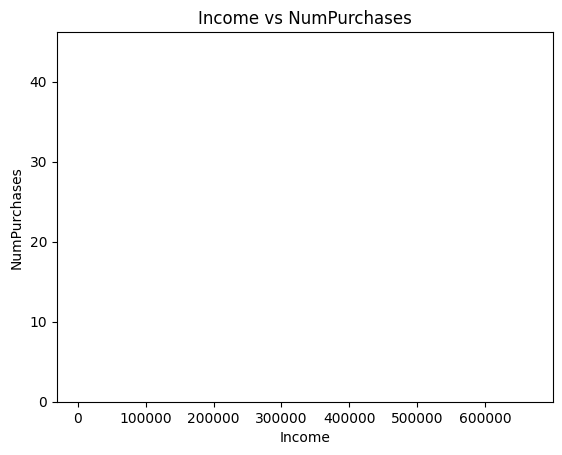

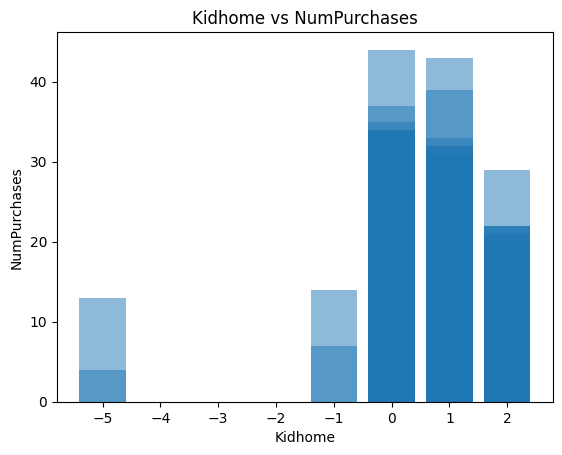

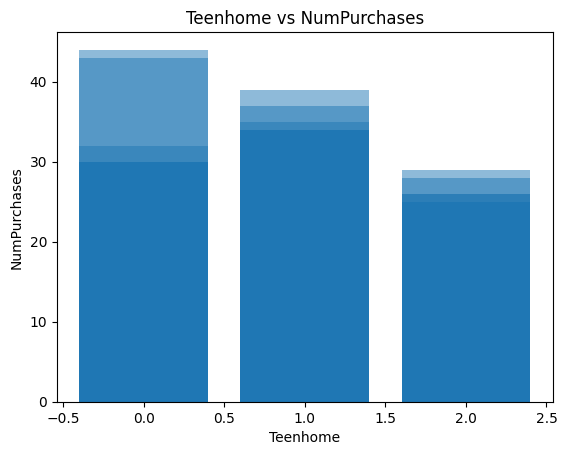

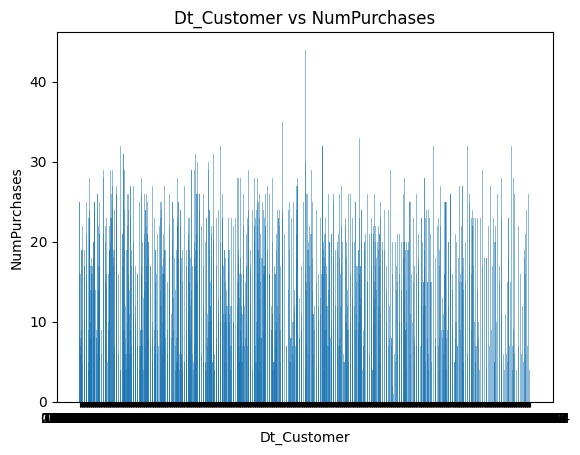

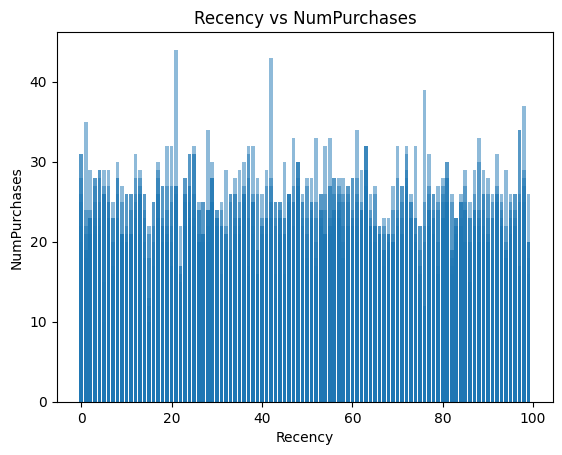

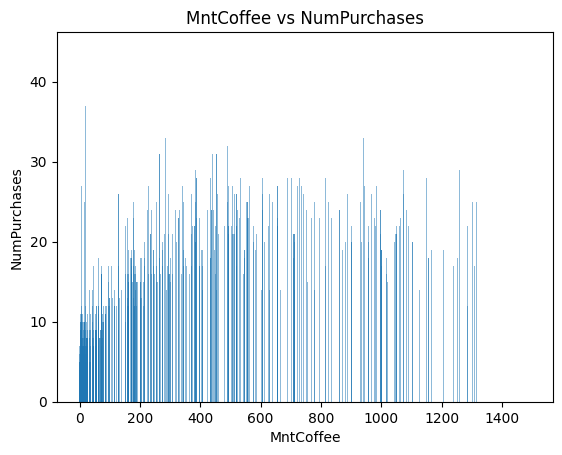

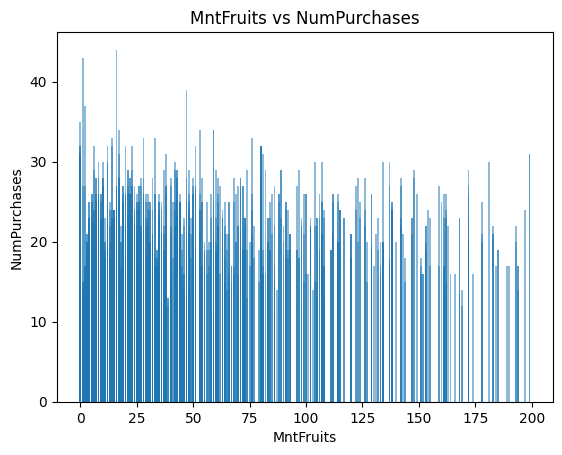

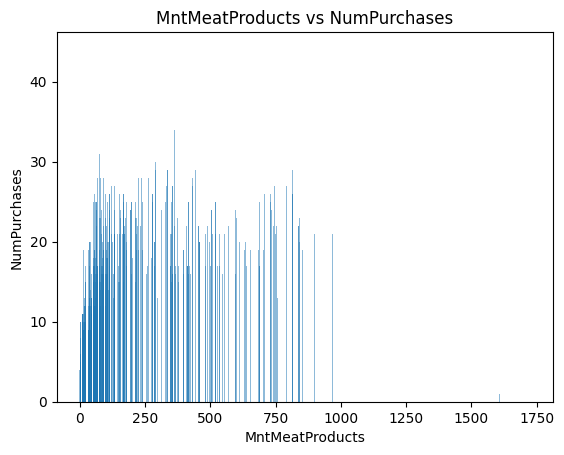

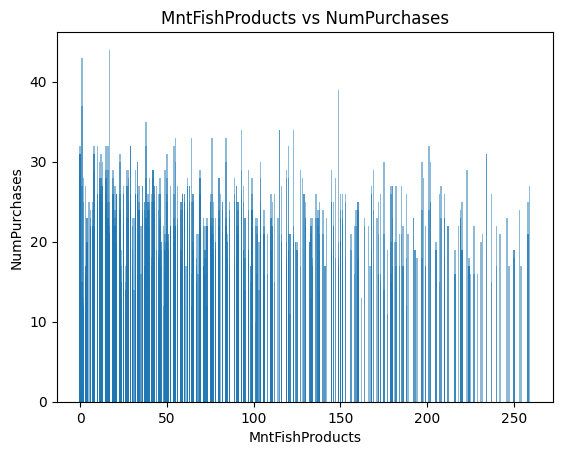

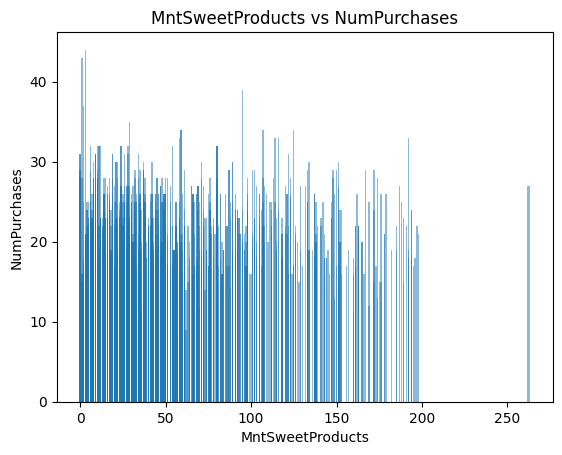

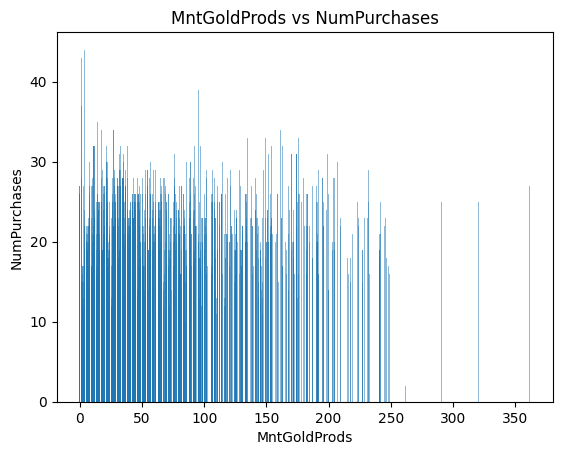

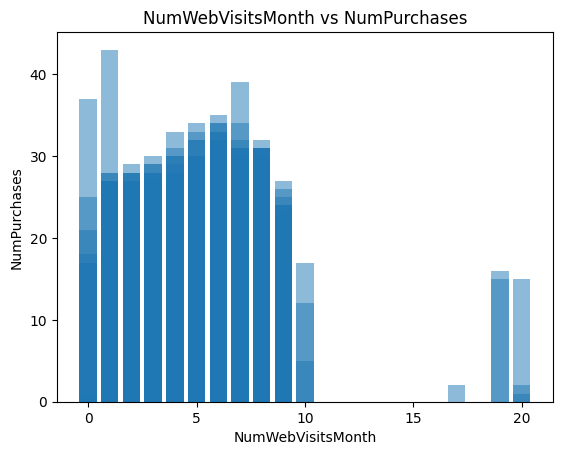

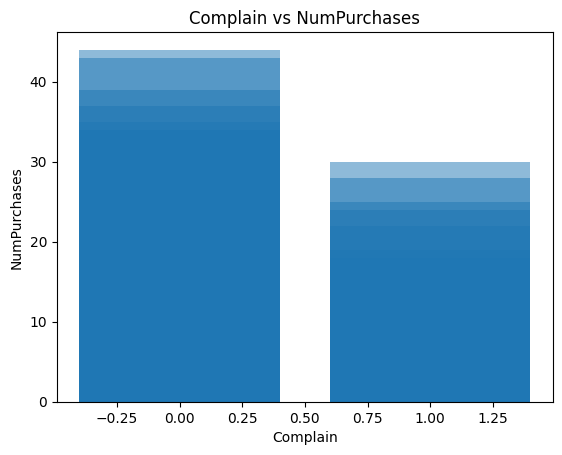

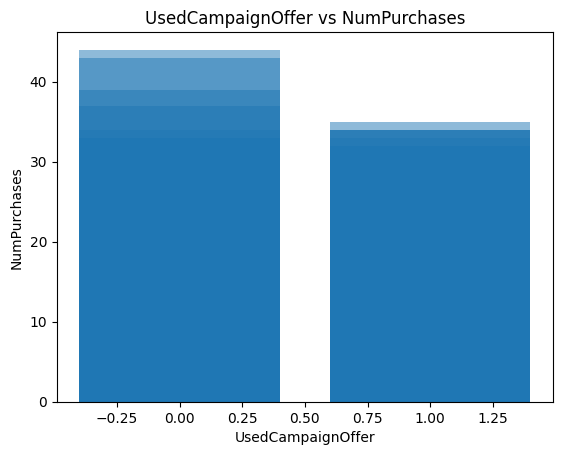

In [594]:
for feature_column in feature_columns:
    if(feature_column.startswith('Unnamed')):
        continue
    plt.bar(data[feature_column], data[target_column], alpha=0.5)
    plt.title(f'{feature_column} vs {target_column}')
    plt.xlabel(feature_column)
    plt.ylabel(target_column)
    plt.show()

$$x_{\text{normalized}} = \frac{x - \text{min}(x)}{\text{max}(x) - \text{min}(x)}$$
$$x_{\text{standardized}} = \frac{x - \text{mean}(x)}{\text{std}(x)}$$
<h2 dir='rtl' style='color:cyan;text-align:center'>
پیش پردازش
</h2>
<h4 dir='rtl' style='color:cyan;text-align:right'>
<b>سوال 7:</b><br>
استفاده از مدل پیش بینی: اگر تعداد مقادیر گمشده زیاد باشد، می‌توانید یک مدل پیش‌بینی بسازید تا مقادیر گمشده را پیش‌بینی کند و جایگزین کند. این مدل می‌تواند یک رگرسیون یا یک مدل یادگیری عمیق (deep learning) باشد.<br>
یک راه نیز حذف کردن یک ردیف از دیتا ست است (آن که بعضی از ستون هایش حذف شده)<br>
استفاده از روش ها خاص پر کردن: برخی از روش‌های خاص مانند کردن خطای انتقال (imputation methods) مثل K-نزدیک‌ترین همسایه (K-Nearest Neighbors) یا ماتریس تجزیه و تحلیل ماتریس (Matrix Factorization) می‌توانند برای پر کردن مقادیر گمشده موثر باشند.<br>
استفاده از متغیر های دیگر: اگر دیتاست شما دارای متغیرهای مشابه دیگری است، می‌توانید از اطلاعات موجود در متغیرهای دیگر برای پیش‌بینی مقادیر گمشده استفاده کنید.<br>
حال اگر تعداد داده های از دست رفته کم باشد استفاده از میانگین یا مد یا میانه میتواند معقول باشد.
اما برای تعداد از دست رفته زیاد باید از روش هایی همچون پیش بینی از سایر دیتا ها یا اگر دیتا های ما حالت های خاصی دارند باید از این حالت ها استفاده کنیم! و اگر میبینیم که ارتباط آن نوع داده با ستون هدف کم است، حذف آن بهترین و ساده ترین کار است.
<br><br><b>سوال 8:</b><br>
برای MntGoldProds ما از میانگین استفاده میکنیم چون تعداد کمی ازدست دادهایم.<br>
برای MntCoffee , Income , NumWebVisitsMonth از k-nearest میرویم چون به نسبت loss بیشتری داریم!
<br><br><b>سوال 9:</b><br>
هدف اصلی این تکنیک‌ها افزایش کارایی و همگرایی مدل‌های یادگیری ماشین، به ویژه مدل‌های حساس به مقیاس ویژگی‌هاست.<br>
نرمال سازی : هدف: نرمال‌سازی، معمولاً به نام مقیاس‌بندی مین-مکس نیز شناخته می‌شود، به مقیاس‌بندی مقادیر ویژگی‌ها به یک دامنه خاص، معمولاً بین 0 تا 1، می‌پردازد. این تکنیک وقتی مفید است که ویژگی‌ها دارای دامنه واحد‌های مختلف و واحدهای مختلف باشند.<br>
مزایا:
اطمینان حاصل می‌شود که همه ویژگی‌ها مقیاس یکسانی داشته باشند.
کمک به جلوگیری از غلبه بر ویژگی‌های خاص بر اساس مقدار آنها.<br>
استاندارد سازی : هدف: استانداردسازی (یا نرمال‌سازی اسکور زد) ویژگی‌ها را به گونه‌ای تبدیل می‌کند که میانگین آنها صفر و واحد انحراف معیار آنها یک شود. این تکنیک وقتی مفید است که ویژگی‌ها از توزیع نرمال پیروی کنند و الگوریتم یادگیری ماشین بر فرض یک توزیع گاوسی بنا شده باشد.<br>
بنا به توضیحات بالا برای دیتا های ما چون فرضی بر گاوسی بودن دیتا ها نداریم نیازی به استاندارد کردم نیست. اما چون واحد های ستون ها ما متفاوت است پس بهتر است که آن ها را نرمال کنیم!
<br><br><b>سوال 10:</b><br>
Label Encoding : تبدیل برچسب‌های دسته‌ای به مقادیر عددی. هر دسته منحصربه‌فرد یک عدد صحیح نسبت داده می‌شود. این روش مفید است زمانی که متغیر دسته‌ای ترتیبی است و یک ترتیب معنادار بین دسته‌ها وجود دارد.
One-hot-encoding : تبدیل متغیرهای دسته‌ای به بردارهای دودویی (0 یا 1). این روش برای متغیرهای دسته‌ای نامینال مناسب است که بین دسته‌ها ترتیب معناداری وجود ندارد.
Ordinal Encoding : اختصاص مقادیر عددی به دسته‌ها بر اساس ترتیب معنادار آنها. این روش زمانی مفید است که متغیر دسته‌ای یک ترتیب معنادار داشته باشد و می‌خواهید آن ترتیب را حفظ کنید.<br>
در ضمن همه داده نیاز مند این کار ها نیستند برای مثال میتوان بعضی ها را که data loss دارند را حذف نمود یا آن ها که اصلا ربطی به ستون هدف ما ندارن را کلا ستونی حذف کنیم.
<br><br><b>سوال 11:</b><br>
بله همانطور که گفته شد اگر میبینیم که ستون ما ربطی به ستون هدف ندارد حذف آن بهترین کار است تا از گمراه کردن و همچنین محاسبات اضافی بپرهیزیم.
<br><br><b>سوال 12:</b><br>
در مسائل یادگیری ماشین، انتخاب درصد تقسیم بین داده‌های آموزش و داده‌های آزمون به عوامل مختلفی مربوط است که از جمله آنها می‌تواند اندازه دیتاست، پیچیدگی مدل، و اهداف تحلیل باشد. پاسخ دقیقی به این سوال وجود ندارد، اما به طور معمول به صورت  80-20 یا 70-30 جدا میکنند که بیشتری مربوط به train است!<br>
روش ها : <br>
Cross-Validation : در صورتی که دیتاست کوچک باشد یا می‌خواهید از داده‌های خود به بهترین شکل استفاده کنید، می‌توانید از روش‌هایی مانند اعتبارسنجی متقاطع k-fold استفاده کنید. در این روش دیتاست به k زیرمجموعه تقسیم می‌شود و هرکدام از این زیرمجموعه‌ها به ترتیب k-1 بار برای آموزش و یک بار برای آزمون استفاده می‌شوند.<br>
Stratified-Split : اگر دیتاست شما دارای کلاس‌های نامتوازن است، ممکن است بخواهید از نمونه‌برداری با استراتژی استفاده کنید تا اطمینان حاصل شود که توزیع کلاس‌ها در دو مجموعه آموزش و آزمون مشابه باشد.
<br><br><b>سوال 13:</b><br>
در یادگیری ماشین، مجموعه اعتبارسنجی (Validation Set) یک بخش جداگانه از دیتاست است که در طول فاز آموزش برای ارزیابی عملکرد یک مدل استفاده می‌شود. این مجموعه جداگانه از مجموعه آموزش و مجموعه آزمون استفاده می‌شود. مجموعه اعتبارسنجی نقش مهمی در توسعه مدل، تنظیم هایپرپارامترها و جلوگیری از بیش‌برازش دارد.<br>
 این مجموعه به ارزیابی عملکرد مدل بر روی داده‌هایی که مدل تاکنون ندیده است، کمک می‌کند. با نظارت بر عملکرد مدل در مجموعه اعتبارسنجی، می‌توان بهبودهای لازم را اعمال کرد تا از بیش‌برازش یا کم‌برازش جلوگیری شود.
<br><br><b>سوال 14:</b><br>
 یک تکنیک نمونه‌برداری متداول در یادگیری ماشین است که برای ارزیابی عملکرد یک مدل و کاهش خطر بیش‌برازش یا حصول تخمین‌های به شدت خوش‌بینانه به‌کار می‌رود. این تکنیک شامل تقسیم دیتاست به k زیرمجموعه (fold) است و هرکدام از این زیرمجموعه‌ها را به عنوان مجموعه آزمون استفاده کرده و مدل را بر روی k - 1 زیرمجموعه دیگر آموزش می‌دهد. این فرآیند k بار تکرار می‌شود و نتایج هر بار برای به‌دست‌آوردن یک معیار عملکرد واحد میانگین می‌شوند.
 </h4>


In [595]:
data['Income'] = data['Income'].fillna(0)
m = sum(data['Income'])/len(data['Income'])
data['Income'] = data['Income'].fillna(m)
data = data.dropna()
for i, e in enumerate(data['Income']):
    if(e - m > 100000):
        data = data.drop([i])
display(data)

Unnamed: 0     ID  Year_Birth   Education Marital_Status   Income   
3              3   6182        1984  Graduation       Together  26646.0  \
4              4   5324        1981         PhD        Married  58293.0   
6              6    965        1971  Graduation       Divorced  55635.0   
7              7   6177        1985         PhD        Married  33454.0   
8              8   4855        1974         PhD       Together  30351.0   
...          ...    ...         ...         ...            ...      ...   
2234        2234   8372        1974  Graduation        Married      0.0   
2235        2235  10870        1967  Graduation        Married  61223.0   
2236        2236   4001        1946         PhD       Together  64014.0   
2237        2237   7270        1981  Graduation       Divorced  56981.0   
2239        2239   9405        1954         PhD        Married  52869.0   

      Kidhome  Teenhome Dt_Customer  Recency  MntCoffee  MntFruits   
3           1         0  10-02-2014       26       11.0          4  \
4           1         0  19-01-2014       94      173.0         43   
6           0         1  13-11-2012       34      235.0         65   
7           1         0  08-05-2013       32       76.0         10   
8           1         0  06-06-2013       19       14.0          0   
...       ...       ...         ...      ...        ...        ...   
2234        1         0  01-07-2013       81        3.0          3   
2235        0         1  13-06-2013       46      709.0         43   
2236        2         1  10-06-2014       56      406.0          0   
2237        0         0  25-01-2014       91      908.0         48   
2239        1         1  15-10-2012       40       84.0          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds   
3                  20               10                 3           5.0  \
4                 118               46                27          15.0   
6                 164               50                49          27.0   
7                  56                3                 1          23.0   
8                  24                3                 3           2.0   
...               ...              ...               ...           ...   
2234                7                6                 2           9.0   
2235              182               42               118         247.0   
2236               30                0                 0           8.0   
2237              217               32                12          24.0   
2239               61                2                 1          21.0   

      NumWebVisitsMonth  Complain  NumPurchases  UsedCampaignOffer  
3                   6.0         0             8                  0  
4                   5.0         0            19                  0  
6                   6.0         0            21                  0  
7                   8.0         0            10                  0  
8                   9.0         0             6                  1  
...                 ...       ...           ...                ...  
2234                7.0         0             4                  0  
2235                5.0         0            18                  0  
2236                7.0         0            22                  1  
2237                6.0         0            19                  1  
2239                7.0         0            11                  1  

[1841 rows x 20 columns]

Main form of simple linear regression function:
$$f(x) = \alpha x + \beta$$

here we want to find the bias ($\alpha$) and slope($\beta$) by minimizing the derivation of the Residual Sum of Squares (RSS) function:

- step 1: Compute RSS of the training data  

$$ RSS = \Sigma (y_i - (\hat{\beta} + \hat{\alpha} * x_i) )^2 $$

- step 2: Compute the derivatives of the RSS function in terms of $\alpha$ and $\beta$, and set them equal to 0 to find the desired parameters

$$ \frac{\partial RSS}{\partial \beta} = \Sigma (-f(x_i) + \hat{\beta} + \hat{\alpha} * x_i) = 0$$
$$ \to \beta = \hat{y} - \hat{\alpha} \hat{x} \to (1)$$


$$ \frac{\partial RSS}{\partial \alpha} = \Sigma (-2 x_i y_i + 2 \hat{\beta} x_i + 2\hat{\alpha} x_i ^ 2) = 0 \to (2)$$

$$ (1) , (2) \to \hat{\alpha} = \frac{\Sigma{(x_i - \hat{x})(y_i - \hat{y})}}{\Sigma{(x_i - \hat{x})^2}}
$$
$$ \hat{\beta} = y - \hat{a} x$$



Based on the above formula, implement the function below to compute the parameters of a simple linear regression

In [596]:
def simple_linear_regression(input_feature:pd.DataFrame, output:pd.DataFrame):
    c = output - output.mean()
    d = input_feature - input_feature.mean()
    a = sum(c * d) / sum(d * d)
    b = output.mean() - a * input_feature.mean()
    return a , b

Now complete this `get_regression_predictions(...)` function to predict the value of given data based on the calculated intercept and slope

In [597]:
def get_regression_predictions(input_feature, bias, slope):
    return bias * input_feature + slope

Now that we have a model and can make predictions, let's evaluate our model using Root Mean Square Error (RMSE). RMSE is the square root of the mean of the squared differences between the residuals, and the residuals is just a fancy word for the difference between the predicted output and the true output.

Complete the following function to compute the RSME of a simple linear regression model given the input_feature, output, intercept and slope:

In [598]:
def get_root_mean_square_error(predicted_values, outputs):
    d = predicted_values - outputs
    return (sum(d * d) / len(outputs)) ** .5

The RMSE has no bound, thus it becomes challenging to determine whether a particular RMSE value is considered good or bad without any reference point. Instead, we use R2 score. The R2 score is calculated by comparing the sum of the squared differences between the actual and predicted values of the dependent variable to the total sum of squared differences between the actual and mean values of the dependent variable. The R2 score is formulated as below:

$$R^2 = 1 - \frac{SSres}{SStot} = 1 - \frac{\sum_{i=1}^{n} (y_{i,true} - y_{i,pred})^2}{\sum_{i=1}^{n} (y_{i,true} - \bar{y}_{true})^2} $$

Complete the following function to calculate the R2 score of a given input_feature, output, bias, and slope:

In [599]:
def get_r2_score(predicted_values, outputs:pd.Series):
    d = predicted_values - outputs
    c = outputs - outputs.mean()
    return 1 - sum(d * d) / sum(c * c)

Now calculate the fitness of the model.
Remember to provide explanation for the outputs in your code!

In [600]:
x_train,x_test,y_train,y_test = train_test_split(data['Income'], data[target_column])
bias , slope = simple_linear_regression(x_train, y_train)
res = get_regression_predictions(x_test, bias, slope)
rmse = get_root_mean_square_error(res, y_test)
r2 = get_r2_score(res, y_test)
print(r2)
print(rmse)

-0.11848668648492922
7.79429977702097


<h4 dir='rtl' style='color:cyan;text-align:right'>
<br><br><b>سوال 15:</b><br>
ما می‌خواهیم مقادیر آلفا و بتا را به‌گونه‌ای تنظیم کنیم که کمینه کردن تابع خطا برایمان اتفاق بیافتد. برای انجام این کار، مشتق تابع خطا را برابر با صفر قرار می‌دهیم و مشتق جزئی آلفا و بتا نسبت به تابع خطا را محاسبه می‌کنیم.
<br><br><b>سوال 16:</b><br>
ویژگی که بیشترین همبستگی با هدف ما دارد، به نظر می‌آید بهتر عمل می‌کند، بنابراین من ویژگی MntCoffee را برای مدل انتخاب کردم.
<br><br><b>سوال 17:</b><br>
RSS (Residual Sum of Squares) جمع کل اختلاف بین اندازه‌گیری ما و داده‌های آموزش را محاسبه می‌کند. MSE (Mean Squared Error) میانگین مربعات خطاها را محاسبه می‌کند. RMSD (Root Mean Squared Deviation) ریشه میانگین مربعات خطاهاست و انحراف معیار باقیمانده مدل را اندازه‌گیری می‌کند. اما امتیاز R2 یک مقدار بین 0 و 1 است. این امتیاز نشان می‌دهد چقدر مدل ما به داده مناسب می‌شود.
<br><br><b>سوال 18:</b><br>
ویژگی‌های دیگر به خوبی عمل نکردند. بهترین امتیاز R2 پس از ویژگی MntCoffee، مربوط به ویژگی Income است.
</h4>

# Multiple Regression

Multiple regression is a statistical technique that aims to model the relationship between a dependent variable and two or more independent variables.

Multiple regression with n independent variables is expressed as follows:

$$f(x) = \beta _{0} + \beta_{1} x_{1} + \beta_{2} x_{2} + \beta_{3} x_{3} + \beta_{4} x_{4} + ... + \beta_{n} x_{n} + c $$

To optimize the model for accurate predictions, multiple regression commonly employs iterative algorithms such as gradient descent.

The main goal of the optimization process is to make our predictions as close as possible to the actual values.
We measure the prediction error using a cost function, usually denoted as $J(\beta)$.

$$ J(\beta)= \frac {1}{2m} Σ_{i=0}^{m-1}(y_i - (\hat \beta _{0} + \hat \beta_{1} x_{1} + \hat \beta_{2} x_{2} + \hat \beta_{3} x_{3} + \hat \beta_{4} x_{4} + ... + \hat \beta_{n} x_{n}) )^2  $$

Gradient descent iteratively adjusts the coefficients $(\beta_i)$ to minimize the cost function. The update rule for each coefficient is:

$$\beta_{i} = \beta _ {i} - \alpha \frac {∂J(\beta)}{∂\beta_{i}}$$

$$ \frac {∂J(\beta)}{∂\beta_{i}} = \frac {1}{m}Σ_{j=0}^{m-1}(y_j - (\hat \beta _{0} + \hat \beta_{1} x_{j1} + \hat \beta_{2} x_{j2} + \hat \beta_{3} x_{j3} + \hat \beta_{4} x_{j4} + ... + \hat \beta_{n} x_{jn})) x_{ji} $$



## Predicting output given regression weights

Based on the formula above and [np.dot()](https://numpy.org/doc/stable/reference/generated/numpy.dot.html) method, complete this function to compute the predictions for an entire matrix of features given the matrix, bias, and the weights. Provide an explanation of np.dot method and the reasoning behind using this method in your code:

In [601]:
import numpy as np
def predict_output(feature_matrix:np.matrix, weights:np.array, bias:np.number) -> np.array:
    # If a is an N-D array and b is a 1-D array, it is a sum product over the last axis of a and b.
    return np.array(np.dot(feature_matrix, weights)) + bias

## Computing the Derivative

As we saw, the cost function is the sum over the data points of the squared difference between an observed output and a predicted output.

Since the derivative of a sum is the sum of the derivatives, we can compute the derivative for a single data point and then sum over data points. We can write the squared difference between the observed output and predicted output for a single point as follows:

$$
(output  - (const* w _{0} + [feature_1] * w_{1} + ...+ [feature_n] * w_{n}  ))^2
$$

With n feautures and a const , So the derivative will be :


$$
2 * (output  - (const* w _{0} + [feature_1] * w_{1} + ...+ [feature_n] * w_{n}  ))
$$

The term inside the paranethesis is just the error (difference between prediction and output). So we can re-write this as:

$$2 * error*[feature_i] $$


That is, the derivative for the weight for feature i is the sum (over data points) of 2 times the product of the error and the feature itself. In the case of the constant then this is just twice the sum of the errors!

Recall that twice the sum of the product of two vectors is just twice the dot product of the two vectors. Therefore the derivative for the weight for feature_i is just two times the dot product between the values of feature_i and the current errors.


With this in mind, complete the following derivative function which computes the derivative of the weight given the value of the feature (over all data points) and the errors (over all data points).


In [602]:
def feature_derivative(errors:np.array, feature:np.array)->np.number:
    return -2 * np.dot(errors, feature)

## Gradient Descent

Now we will write a function that performs a gradient descent. The basic premise is simple. Given a starting point we update the current weights by moving in the negative gradient direction. Recall that the gradient is the direction of increase and therefore the negative gradient is the direction of decrease and we're trying to minimize a cost function.


The amount by which we move in the negative gradient direction is called the 'step size'. We stop when we are 'sufficiently close' to the optimum. We define this by requiring that the magnitude (length) of the gradient vector to be smaller than a fixed 'tolerance'.


With this in mind, complete the following gradient descent function below using your derivative function above. For each step in the gradient descent we update the weight for each feature befofe computing our stopping criteria.

In [603]:
def regression_gradient_descent(feature_matrix:np.matrix, outputs:np.array, initial_weights:np.array, bias:np.number, step_size:np.number, tolerance:np.number)->(np.number, np.number):
    while True:
        errors = (outputs - np.dot(feature_matrix, initial_weights) - bias) / len(outputs)
        max_der = 0
        for index, feature in enumerate(feature_matrix.T):
            derivate = feature_derivative(errors, feature)
            if abs(derivate) > max_der:
                max_der = abs(derivate)
            initial_weights[index] -= step_size * derivate
        bias += step_size * sum(errors)
        # print(initial_weights, bias)
        if max_der < tolerance:
            break
    return initial_weights, bias

In [604]:
def normalize_features(chosen_features:list[str], data_frame:pd.DataFrame):
    for feature in chosen_features:
        data_frame[feature] = (data_frame[feature] - data_frame[feature].mean()) / data_frame[feature].std()
    return data_frame


def n_feature_regression(chosen_feature_matrix, target_matrix, keywords):
    initial_weights = keywords['initial_weights']
    step_size = keywords['step_size']
    tolerance = keywords['tolerance']
    bias = keywords['bias']
    return regression_gradient_descent(chosen_feature_matrix, target_matrix, initial_weights, bias, step_size, tolerance)

def get_weights_and_bias(chosen_features:list, target_feature:str, data_frame:pd.DataFrame):
    """
    Computes the weights and bias for a general n feature model.
    :param chosen_features:  list of features to perform multiple regression on
    :return: chosen_feature_matrix, computed weights and bias via regression
    """

    # ToDo
    #  Would selecting different initial weights make any difference?
    #  Explain your answer.
    keywords = {
        'initial_weights': np.array([.5]*len(chosen_features)),
        'step_size': 1.e-4,
        'tolerance': 1.e-10,
        'bias': 0
    }

    chosen_feature_dataframe = data_frame[chosen_features]
    # ToDo
    #  Why are the features normalized?
    chosen_feature_dataframe = normalize_features(chosen_features, chosen_feature_dataframe)
    chosen_feature_matrix = chosen_feature_dataframe.to_numpy()

    # data_frame[target_feature] = (data_frame[target_feature] - data_frame[target_feature].mean()) / data_frame[target_feature].std()
    target_matrix = data_frame[target_feature].to_numpy()

    train_weights, bias = n_feature_regression(chosen_feature_matrix, target_matrix, keywords)

    return train_weights, bias

In [605]:
def Regression(chosen_features, train, test):
    tw, b = get_weights_and_bias(chosen_features, target_column, train)
    predict = predict_output(test[chosen_features], tw, b)
    r2 = get_r2_score(predict, test[target_column])
    rmse = get_root_mean_square_error(predict, test[target_column])
    print(tw, b)
    print(f"R2 : {r2}")
    print(f"RMSE : {rmse}")

## Two Feature Regression

In this part, you should choose 2 features and implement multiple regression on them :

In [606]:
filter = np.random.rand(len(data)) < 0.8
train = data[filter]
test = data[~filter]

In [607]:
real_out = data[target_column]

chosen_features = ['MntCoffee', 'MntGoldProds']
display(test)

Regression(chosen_features, train, test)

Unnamed: 0     ID  Year_Birth   Education Marital_Status    Income   
8              8   4855        1974         PhD       Together   30351.0  \
10            10   1994        1983  Graduation        Married       0.0   
16            16   9736        1980  Graduation        Married   41850.0   
21            21   5376        1979  Graduation        Married    2447.0   
22            22   1993        1949         PhD        Married   58607.0   
...          ...    ...         ...         ...            ...       ...   
2223        2223   1448        1963      Master        Married   33562.0   
2225        2225   4749        1968  Graduation       Together   58554.0   
2229        2229  10084        1972  Graduation        Married   24434.0   
2233        2233   9432        1977  Graduation       Together  666666.0   
2236        2236   4001        1946         PhD       Together   64014.0   

      Kidhome  Teenhome Dt_Customer  Recency  MntCoffee  MntFruits   
8           1         0  06-06-2013       19       14.0          0  \
10          1         0  15-11-2013       11        5.0          5   
16          1         1  24-12-2012       51       53.0          5   
21          1         0  06-01-2013       42        1.0          1   
22          0         1  23-12-2012       63      867.0          0   
...       ...       ...         ...      ...        ...        ...   
2223        1         2  25-06-2014       33       21.0         12   
2225        1         1  26-09-2012       55      368.0         24   
2229        2         0  18-05-2014        9        3.0          2   
2233        1         0  02-06-2013       23        9.0         14   
2236        2         1  10-06-2014       56      406.0          0   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds   
8                  24                3                 3           2.0  \
10                  6                0                 2           1.0   
16                 19                2                13           4.0   
21               1725                1                 1           1.0   
22                 86                0                 0          19.0   
...               ...              ...               ...           ...   
2223               12                0                 3           3.0   
2225               68               38                 0          88.0   
2229                8               20                 0          17.0   
2233               18                8                 1          12.0   
2236               30                0                 0           8.0   

      NumWebVisitsMonth  Complain  NumPurchases  UsedCampaignOffer  
8                   9.0         0             6                  1  
10                  7.0         0             4                  0  
16                  8.0         0             9                  0  
21                  1.0         0            43                  0  
22                  8.0         0            17                  1  
...                 ...       ...           ...                ...  
2223                4.0         0             9                  0  
2225                7.0         0            22                  0  
2229                7.0         0             7                  0  
2233                6.0         0            11                  0  
2236                7.0         0            22                  1  

[392 rows x 20 columns]

C:\Users\AliGH\AppData\Local\Temp\ipykernel_17480\1121659383.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame[feature] = (data_frame[feature] - data_frame[feature].mean()) / data_frame[feature].std()


[4.74718955 1.91227445] 14.825396808729044
R2 : -78416.45024401252
RMSE : 2121.9574731204902


## Three Feature Regression

Now repeat the steps for 3 features

In [608]:
chosen_features = ['MntCoffee', 'MntGoldProds', 'Income']

Regression(chosen_features, train, test)

C:\Users\AliGH\AppData\Local\Temp\ipykernel_17480\1121659383.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame[feature] = (data_frame[feature] - data_frame[feature].mean()) / data_frame[feature].std()


[4.06063831 1.74733061 1.4628706 ] 14.82539682525918
R2 : -142684938.71532357
RMSE : 90514.75606331475


## Five Feature Regression

Finally, repeat the steps for 5 features

Explain the differences in the results and the reasoning behind these variations.

In [609]:
chosen_features = ['MntCoffee', 'Recency', 'MntGoldProds', 'Income', 'Complain']

Regression(chosen_features, train, test)

C:\Users\AliGH\AppData\Local\Temp\ipykernel_17480\1121659383.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame[feature] = (data_frame[feature] - data_frame[feature].mean()) / data_frame[feature].std()


[ 4.06174838 -0.04526742  1.74866421  1.46165067  0.02409092] 14.82539682526168
R2 : -142446322.75028908
RMSE : 90439.0392311338


<h4 dir='rtl' style='color:cyan;text-align:right'>
MntCoffee , Income تاثیر بیشتری در خروجی دارند
</h4>

<h4 dir='rtl' style='color:cyan;text-align:right'>

</h4>

# Classification

### Decsion Tree

In [610]:
from sklearn import tree,neighbors,linear_model,ensemble
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier

HIGH = 1
LOW = 0

In [611]:
purchase_num = np.array(data['NumPurchases'])
purchase_rate = np.where(purchase_num < np.median(purchase_num), LOW, HIGH)

Fitting 3 folds for each of 980 candidates, totalling 2940 fits


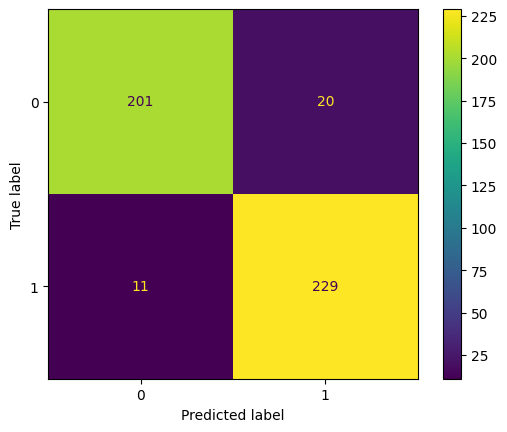

In [612]:
feature_names = ['Income','MntCoffee','MntMeatProducts','Recency','Complain']
features = data[feature_names]
params = {'max_leaf_nodes': list(range(2, 100)), 'max_depth': list(range(5, 10)),'criterion':['entropy','gini']}
dtree = GridSearchCV(tree.DecisionTreeClassifier(random_state=85), params, verbose=1, cv=3)
x_train,x_test,y_train,y_test = train_test_split(features,purchase_rate.reshape(-1,1))
dtree.fit(x_train,y_train)
predictions = dtree.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=dtree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dtree.classes_)
disp.plot()
plt.show()

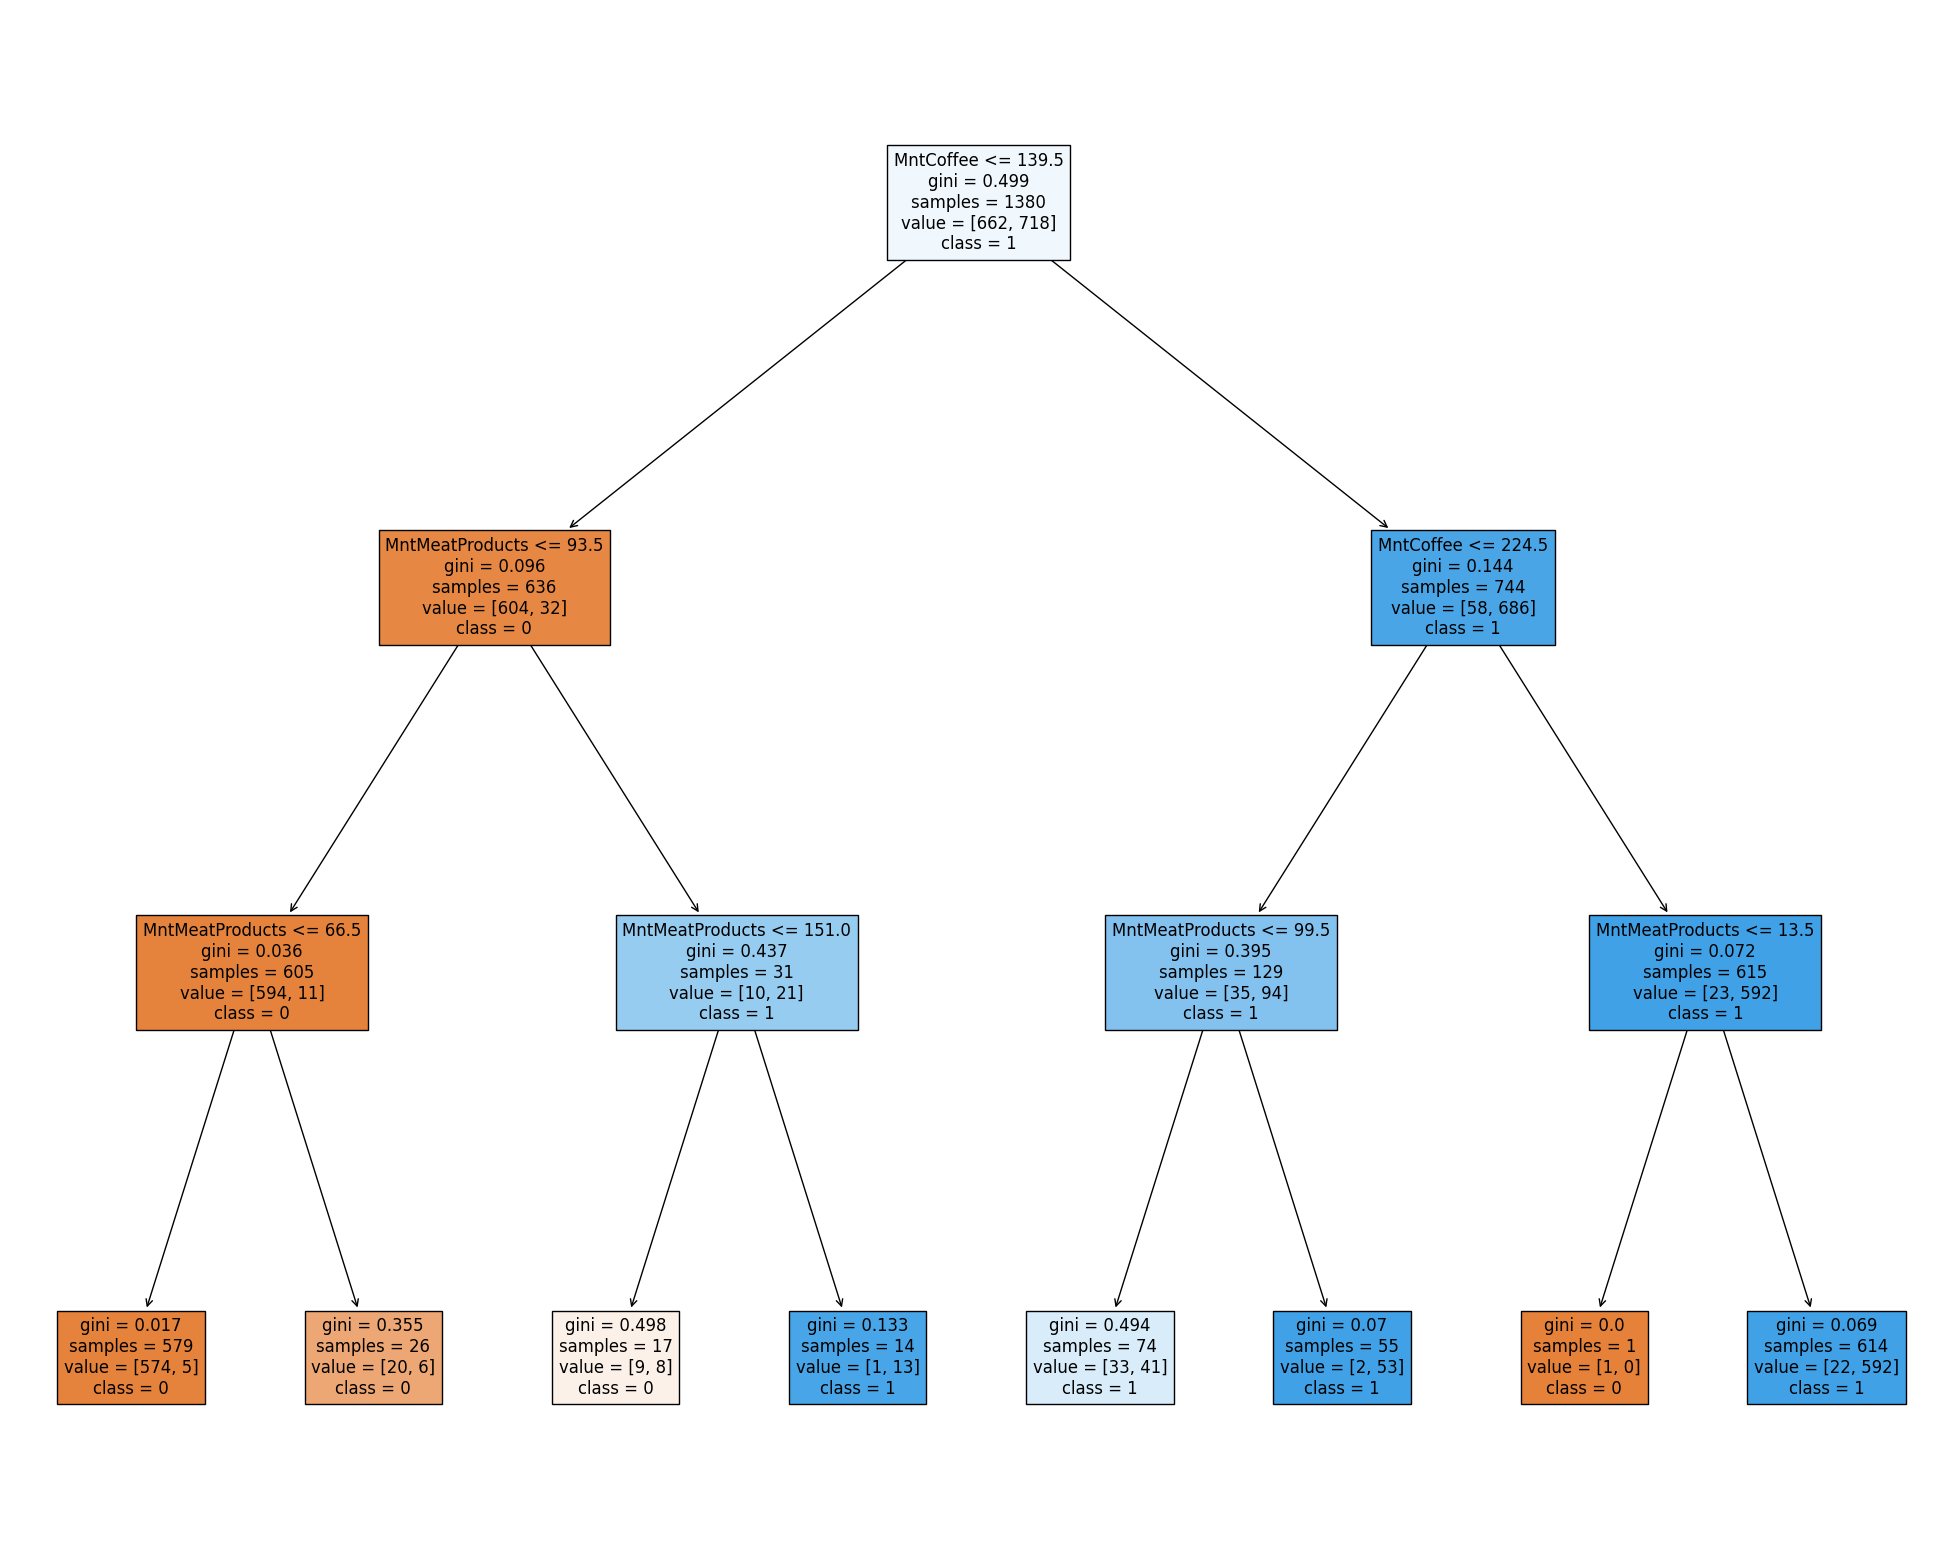

In [613]:
dtree = tree.DecisionTreeClassifier(max_depth=3)
dtree.fit(x_train,y_train)
predictions = dtree.predict(x_test)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree, feature_names=feature_names, class_names=['0','1'], filled=True)

In [614]:
predictions = dtree.predict(x_test)
print(f"test f1 score: {f1_score(y_test,predictions)}")
predictions = dtree.predict(x_train)
print(f"train f1 score: {f1_score(y_train,predictions)}")

test f1 score: 0.9287169042769858
train f1 score: 0.9477966101694915


<h4 dir='rtl' style='color:cyan;text-align:right'>
<b>سوال 21:</b><br>
مدل ما به خوبی عمل میکند و بیش برازش ندارد!
</h4>

### KNeighbors

c:\Users\AliGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\AliGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\AliGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\AliGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:233: 

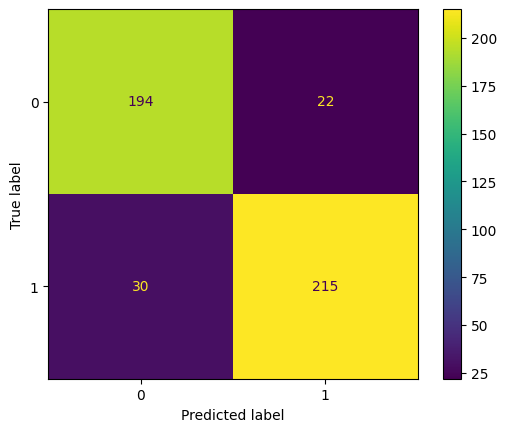

In [615]:
feature_names = ['Income','MntCoffee','MntMeatProducts','Recency','Complain']
features = data[feature_names]
params = {'n_neighbors':[i for i in range(3,14,2)]}
knn = GridSearchCV(neighbors.KNeighborsClassifier(),param_grid=params)
x_train,x_test,y_train,y_test = train_test_split(np.array(features),purchase_rate.reshape(-1,1))
x_train = np.array(x_train)
y_train = np.array(y_train)
knn.fit(x_train,y_train)
predictions = knn.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
disp.plot()
plt.show()

In [616]:
predictions = knn.predict(x_test)
print(f"test f1 score: {f1_score(y_test,predictions)}")
predictions = knn.predict(x_train)
print(f"train f1 score: {f1_score(y_train,predictions)}")

test f1 score: 0.892116182572614
train f1 score: 0.9432375613174492


<h4 dir='rtl' style='color:cyan;text-align:right'>
<b>سوال 21:</b><br>
مدل ما به خوبی عمل میکند و بیش برازش ندارد!
</h4>

### Logestic Regression

c:\Users\AliGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\AliGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

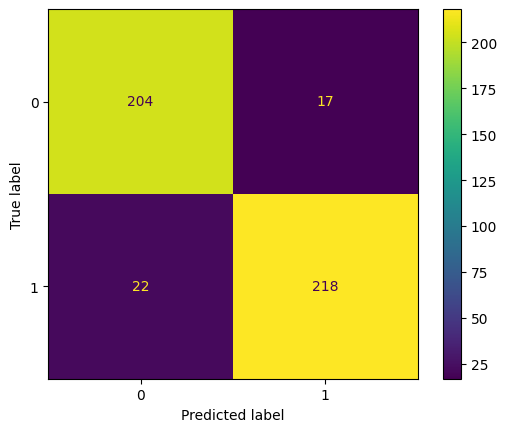

In [617]:
feature_names = ['Income','MntCoffee','MntMeatProducts','Recency','Complain']
features = data[feature_names]
params = {'tol':[0.0001,0.00001,0.000001]}
log = GridSearchCV(linear_model.LogisticRegression(),param_grid=params)
x_train,x_test,y_train,y_test = train_test_split(np.array(features),purchase_rate.reshape(-1,1))
log.fit(x_train,np.squeeze(y_train))
predictions = log.predict(x_test)
cm = confusion_matrix(np.squeeze(y_test), predictions, labels=log.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log.classes_)
disp.plot()
plt.show()

In [618]:
predictions = log.predict(x_test)
print(f"test f1 score: {f1_score(y_test,predictions)}")
predictions = log.predict(x_train)
print(f"train f1 score: {f1_score(y_train,predictions)}")

test f1 score: 0.9178947368421052
train f1 score: 0.8997175141242938


<h4 dir='rtl' style='color:cyan;text-align:right'>
<b>سوال 21:</b><br>
مدل ما به خوبی عمل میکند و بیش برازش ندارد!
<br><br><b>سوال 22:</b><br>
بله، اسکیل کردن ویژگی‌ها باعث افزایش عملکرد مدل شد. اما مؤثرترین پیش‌پردازشی که انجام دادم حذف نقاط پرتی بود که به مدل ما خیلی کمک کرد.
</h4>

### Ensemble Learning

<h4 dir='rtl' style='color:cyan;text-align:right'>
<b>سوال 24:</b><br>
معیار تقسیم و تعداد درختان دو پارامتر هایپرمتری استفاده شده در جنگل‌های تصادفی هستند.
</h4>

[]

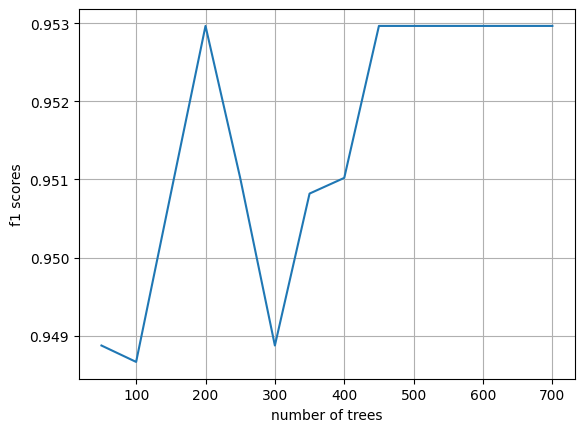

In [619]:
scores =[]
num_of_trees = []
for i in range(1,15):
    rf = ensemble.RandomForestClassifier(n_estimators=50*i,criterion='gini')
    rf.fit(x_train,np.squeeze(y_train))
    preds = rf.predict(x_test)
    scores.append(f1_score(np.squeeze(y_test),preds))
    num_of_trees.append(i*50)


plt.plot(num_of_trees,scores)
plt.ylabel("f1 scores")
plt.xlabel("number of trees")
plt.grid()
plt.plot()

[]

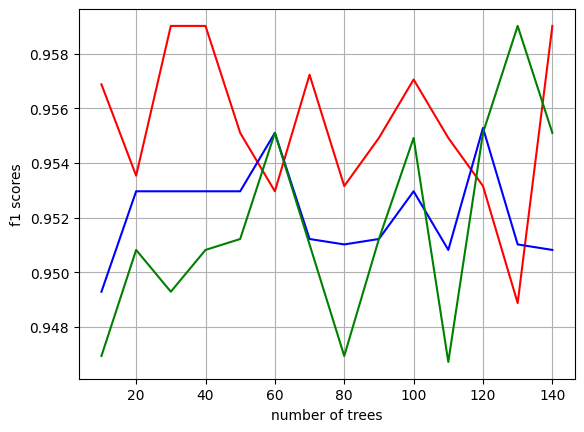

In [620]:
scores5 =[]
scores10 =[]
scores20 =[]

num_of_trees = []
for i in range(1,15):
    rf = ensemble.RandomForestClassifier(n_estimators=10*i, max_depth=5)
    rf10 = ensemble.RandomForestClassifier(n_estimators=10*i, max_depth=10)
    rf20 = ensemble.RandomForestClassifier(n_estimators=10*i, max_depth=20)

    rf.fit(x_train,np.squeeze(y_train))
    preds = rf.predict(x_test)
    scores5.append(f1_score(np.squeeze(y_test),preds))
    rf10.fit(x_train,np.squeeze(y_train))
    preds = rf10.predict(x_test)
    scores10.append(f1_score(np.squeeze(y_test),preds))
    rf20.fit(x_train,np.squeeze(y_train))
    preds = rf20.predict(x_test)
    scores20.append(f1_score(np.squeeze(y_test),preds))
    num_of_trees.append(i*10)


plt.plot(num_of_trees, scores5 , color = 'r')
plt.plot(num_of_trees, scores10 , color = 'b')
plt.plot(num_of_trees, scores20 ,  color = 'g')

plt.ylabel("f1 scores")
plt.xlabel("number of trees")
plt.grid()
plt.plot()

<h4 dir='rtl' style='color:cyan;text-align:right'>
<b>سوال 26:</b><br>
حریم خصوصی بخش مهمی از زندگی افراد است و مجموعه‌های داده حاوی اطلاعات زیادی هستند که ممکن است به نادرستی استفاده شوند. برای جلوگیری از نشت اطلاعات، ما یک مقدار نویز به مجموعه داده خود اضافه می‌کنیم.
<br><br><b>سوال 27:</b><br>
لپلاس نویز با نمونه‌برداری از توزیع لپلاس ایجاد می‌شود و به هر داده اضافه می‌شود. به عبارت دیگر، نویز لپلاس از توزیع لپلاس نمونه‌برداری می‌کند و به هر داده افزوده می‌شود. به عکس العمل، نویز نمایی از توزیع نمایی نمونه‌برداری می‌کند. نویز لپلاس موثرتر است زمانی که می‌خواهیم ویژگی‌های کلی مجموعه داده را حفظ کنیم.
</h4>

In [621]:
feature_names = ['Income','MntCoffee','Recency','Complain']
for feat in feature_names:
    noise = np.random.laplace(scale=0.1,size= (1841,1))
    data[feat] += np.squeeze(noise)

feature_names = ['Income','MntCoffee','Recency','Complain']
x_train,x_test,y_train,y_test = train_test_split(np.array(data[feature_names]),purchase_rate.reshape(-1,1))

Fitting 3 folds for each of 980 candidates, totalling 2940 fits


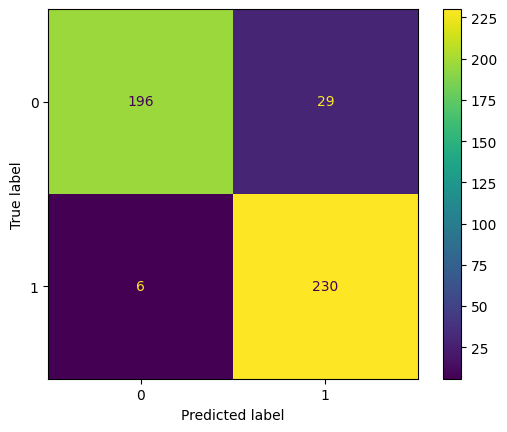

In [622]:
params = {'max_leaf_nodes': list(range(2, 100)), 'max_depth': list(range(5, 10)),'criterion':['entropy','gini']}
dtree = GridSearchCV(tree.DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
dtree.fit(x_train,y_train)
predictions = dtree.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=dtree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dtree.classes_)
disp.plot()
plt.show()

<h4 dir='rtl' style='color:cyan;text-align:right'>
<b>سوال 28:</b><br>
این باعث کاهش کارایی مدل ما به میزان کمی شده است، اما این کاهش به شدت قابل مشاهده نیست. بنابراین، ممکن است این روش یک روش قابل قبول برای افزایش حریم خصوصی باشد.
</h4>

c:\Users\AliGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\AliGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\AliGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\AliGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:233: 

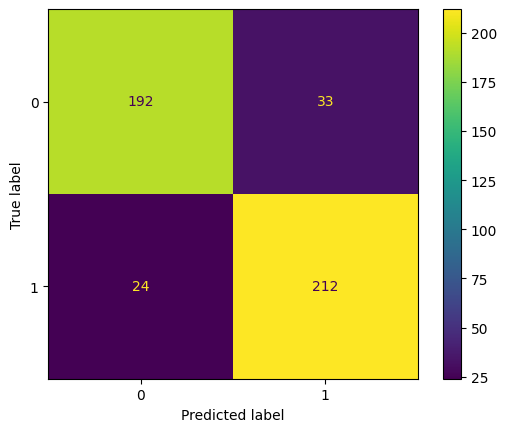

In [623]:
params = {'n_neighbors':[i for i in range(3,14,2)]}
knn = GridSearchCV(neighbors.KNeighborsClassifier(),param_grid=params)
knn.fit(x_train,y_train)
predictions = knn.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
disp.plot()
plt.show()

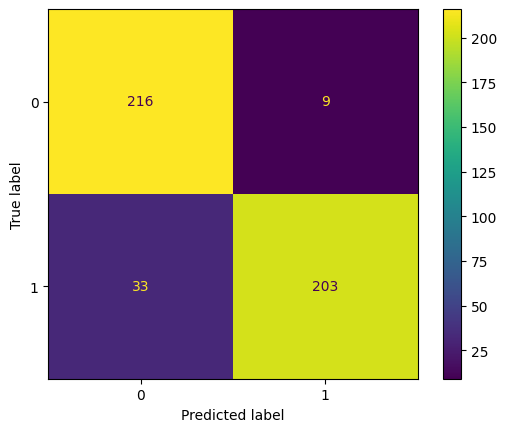

In [624]:
params = {'tol':[0.0001,0.00001,0.000001]}
log = GridSearchCV(linear_model.LogisticRegression(),param_grid=params)
log.fit(x_train,np.squeeze(y_train))
predictions = log.predict(x_test)
cm = confusion_matrix(np.squeeze(y_test), predictions, labels=log.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log.classes_)
disp.plot()
plt.show()

### Gradient Boosting

<h4 dir='rtl' style='color:cyan;text-align:right'>
<b>سوال 29:</b><br>
در جنگل‌های تصادفی، انباشت داده‌ها با ترکیب نتایج در پایان انجام می‌شود. اما در تقویت درخت‌ها، این انباشت داده‌ها به صورت متوالی انجام می‌شود.
<br><br><b>سوال 30:</b><br>
اکس‌جی‌بوست یک مجموعه از درخت‌های تصمیم دارد، هرکدام از آن‌ها بر روی یک زیرمجموعه از داده‌ها کار می‌کند. هر طبقه‌بند خروجی خود را به درخت بعدی منتقل می‌کند. این امر منجر به عملکرد بالای مدل می‌شود.
</h4>

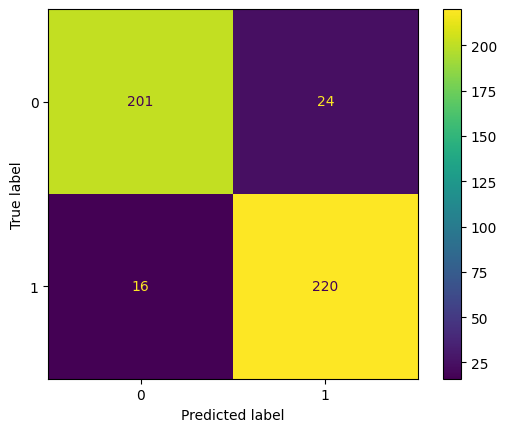

In [625]:
model = XGBClassifier()
model.fit(x_train,y_train)
preds = model.predict(x_test)
cm = confusion_matrix(y_test, preds, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
disp.plot()
plt.show()